In [3]:
!pip install yaml

ERROR: Could not find a version that satisfies the requirement yaml (from versions: none)
ERROR: No matching distribution found for yaml

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import numpy as np
#import oak

In [2]:
#methods_reformat_annotate.out

In [3]:
file_path = 'children_for_branches_v4.out'

# Load the file into a DataFrame
branches_df = pd.read_csv(file_path, sep='\t', header=0)

# Name the columns
#branches_df.columns = ['ID', 'Label', 'Predicate', 'Object', 'ParentID', 'ParentLabel']

# Remove the appended AIO branch name from the ID column
# This regex pattern looks for an underscore followed by any characters at the end of the string and replaces it with nothing
#branches_df['ID'] = branches_df['ID'].str.replace(r'_[A-Za-z]+$', '', regex=True)

print(branches_df)

                                              subject  \
0                                              aio:AE   
1                                              aio:AE   
2                                              aio:AE   
3                                             aio:ANN   
4                                             aio:ANN   
...                                               ...   
1074  aio:t-Distributed_Stochastic_Neighbor_embedding   
1075  aio:t-Distributed_Stochastic_Neighbor_embedding   
1076  aio:t-Distributed_Stochastic_Neighbor_embedding   
1077  aio:t-Distributed_Stochastic_Neighbor_embedding   
1078  aio:t-Distributed_Stochastic_Neighbor_embedding   

                                    subject_label        predicate  \
0                            Auto Encoder Network  rdfs:subClassOf   
1                            Auto Encoder Network  rdfs:subClassOf   
2                            Auto Encoder Network  rdfs:subClassOf   
3                       Artificial 

In [28]:
def find_ontology_branch(subject, branches_df):
    ontology_branches = ['Network', 'Layer', 'Function', 'Machine Learning', 'Preprocessing', 'Bias', 'Model']
    visited_subjects = set()  # Keep track of visited subjects to avoid infinite loops

    while True:
        if subject in visited_subjects:
            # Break the loop if we're revisiting a subject, indicating a cycle
            return 'Unknown'
        visited_subjects.add(subject)
        #print(subject)
              
        row = branches_df[branches_df['subject'] == subject]
        #print(row)
        if not row.empty:
            parent_id = row.iloc[0]['object']  # Get parent ID
            #print("parent "+parent_id)
            parent_row = branches_df[branches_df['subject'] == parent_id]  # Find the parent row
            if not parent_row.empty:
                parent_label = parent_row.iloc[0]['object_label']
                if parent_label in ontology_branches:
                    return parent_label
                else:
                    # Update subject to the parent's subject for the next iteration
                    subject = parent_row.iloc[0]['subject']
            else:
                return 'Unknown'
        else:
            return 'Unknown'

# Apply the function to each row in branches_df to find its ontology branch
# Note: This operation might still be time-consuming for large dataframes; consider optimizing if necessary
branches_df['ontology_branch'] = branches_df['subject'].apply(lambda x: find_ontology_branch(x, branches_df))


In [5]:
branches_df['ontology_branch']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
4       Unknown
         ...   
1074    Unknown
1075    Unknown
1076    Unknown
1077    Unknown
1078    Unknown
Name: ontology_branch, Length: 1079, dtype: object

In [6]:
branches_df.columns

Index(['subject', 'subject_label', 'predicate', 'predicate_label', 'object',
       'object_label', 'ontology_branch'],
      dtype='object')

In [7]:
classification_rows = branches_df.loc[branches_df['subject'] == 'aio:Classification']
classification_rows

,subject,subject_label,predicate,predicate_label,object,object_label,ontology_branch
140,aio:Classification,Classification,rdfs:subClassOf,None,aio:Classification,Classification,Unknown
141,aio:Classification,Classification,rdfs:subClassOf,None,aio:Machine_Learning,Machine Learning,Unknown
142,aio:Classification,Classification,rdfs:subClassOf,None,aio:Method,Method,Unknown
143,aio:Classification,Classification,rdfs:subClassOf,None,aio:Supervised_Learning,Supervised Learning,Unknown


In [8]:
with open('methods_reformat_annotate_AIOonly.txt', 'r') as file:
    data = file.read()

In [9]:
records = [record for record in data.split('--') if record.strip()]

# Parse each YAML record into a dictionary
parsed_records = [yaml.safe_load(record) for record in records]

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(parsed_records)

print(df)

             predicate_id                                          object_id  \
0              rdfs:label                 https://w3id.org/aio/Normalization   
1              rdfs:label                 https://w3id.org/aio/Normalization   
2              rdfs:label                 https://w3id.org/aio/Normalization   
3              rdfs:label                 https://w3id.org/aio/Normalization   
4              rdfs:label                 https://w3id.org/aio/Normalization   
...                   ...                                                ...   
9683  oio:hasExactSynonym  https://w3id.org/aio/AutoregressiveConditional...   
9684           rdfs:label                         https://w3id.org/aio/Layer   
9685           rdfs:label                       https://w3id.org/aio/Network   
9686           rdfs:label                 https://w3id.org/aio/Normalization   
9687           rdfs:label                         https://w3id.org/aio/Model   

       object_label   match_string  mat

In [27]:
#parsed_records

In [11]:
filtered_df = df[~((df['object_label'].str.isupper()) & (~df['match_string'].str.isupper()))]


In [12]:
filtered_df['match_string'].unique()

array(['Normalization', 'Reinforcement Learning',
       'convolutional neural network', 'layer', 'network', 'Network',
       'Convolutional Neural Network', 'attention layer', 'model',
       'self-attention', 'Parameter Efficiency',
       'Natural Language Processing', 'GELU', 'classification', 'GAN',
       'Model', 'reinforcement learning', 'model parallelism', 'DN',
       'DNN', 'self-supervised', 'Self-supervised', 'feature learning',
       'GCN', 'clustering', 'Graph Convolutional Network',
       'computational efficiency', 'BERT', 'FFN', 'MLP', 'Layer',
       'Contrastive Learning', 'normalization',
       'Artificial Neural Network', 'bias', 'contrastive learning',
       'Classification', 'feature extraction', 'NN',
       'Self-Supervised Learning', 'Supervised Learning',
       'Self-Supervised', 'ResNet', 'node2vec', 'Feature Learning',
       'Clustering', 'Self-Attention', 'MP', 'language model',
       'masked language model', 'Language Model', 'sigmoid function',

In [13]:
subset_df = filtered_df[filtered_df['object_id'].str.contains('aio/')]
subset_df

,predicate_id,object_id,object_label,match_string,matches_whole_text,subject_start,subject_end
0,rdfs:label,https://w3id.org/aio/Normalization,Normalization,Normalization,False,20,32
1,rdfs:label,https://w3id.org/aio/Normalization,Normalization,Normalization,False,25,37
2,rdfs:label,https://w3id.org/aio/Normalization,Normalization,Normalization,False,29,41
3,rdfs:label,https://w3id.org/aio/Normalization,Normalization,Normalization,False,21,33
4,rdfs:label,https://w3id.org/aio/Normalization,Normalization,Normalization,False,16,28
...,...,...,...,...,...,...,...
9681,rdfs:label,https://w3id.org/aio/Network,Network,Network,False,37,43
9684,rdfs:label,https://w3id.org/aio/Layer,Layer,layer,False,647,651
9685,rdfs:label,https://w3id.org/aio/Network,Network,network,False,373,379
9686,rdfs:label,https://w3id.org/aio/Normalization,Normalization,Normalization,False,569,581


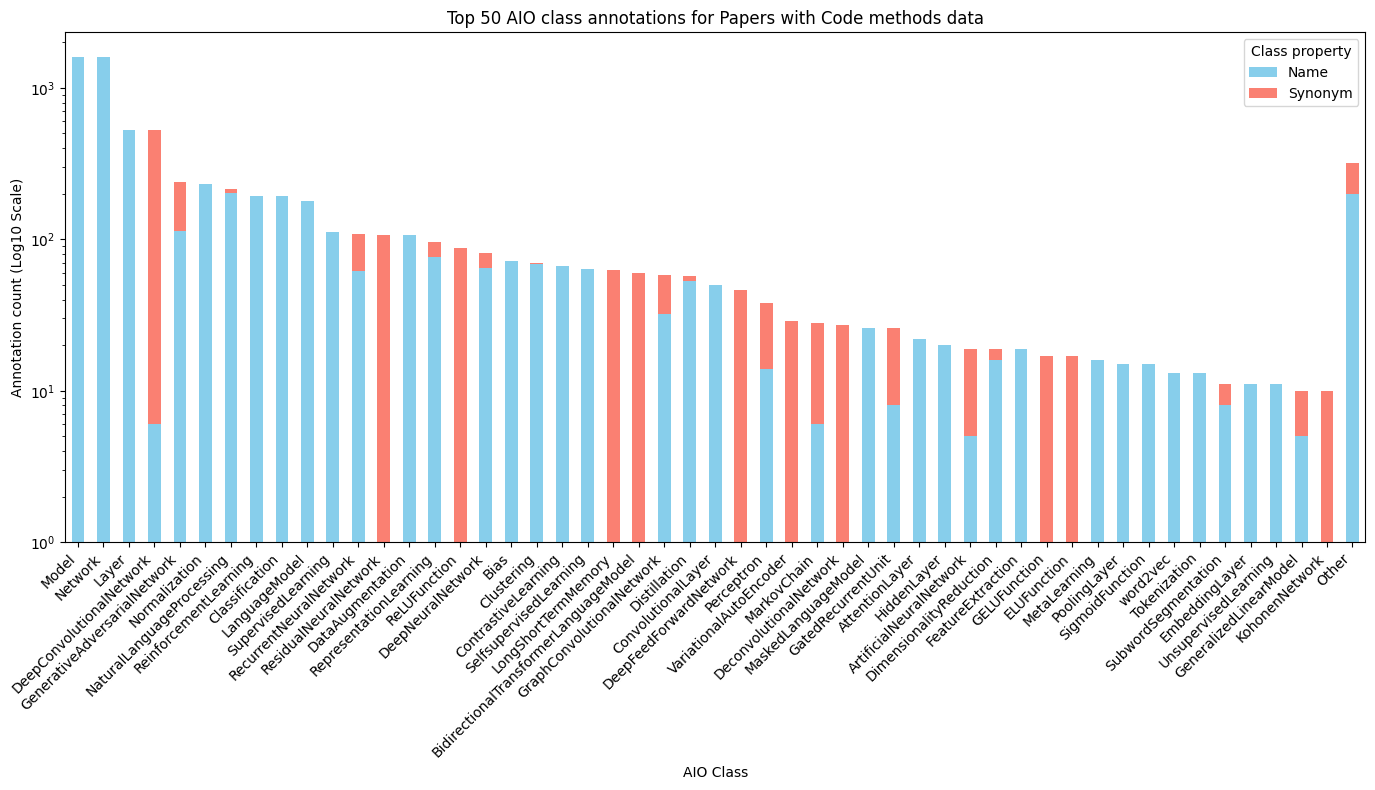

In [14]:
# Map existing predicate_id values to new ones
predicate_id_mapping = {
    'rdfs:label': 'Name',
    'oio:hasExactSynonym': 'Exact Synonym',
    'oio:hasRelatedSynonym': 'Related Synonym'
}
df_copy = subset_df.copy()
df_copy['predicate_id'] = df_copy['predicate_id'].replace(predicate_id_mapping)

# Add a column for counts (assuming each row is a unique count)
df_copy['count'] = 1

# Pivot the DataFrame to get counts for each predicate_id for each object_id
pivot_df = df_copy.pivot_table(index='object_id', columns='predicate_id', values='count', aggfunc='sum', fill_value=0)

# Modify the index to only show the string value after the last '/'
pivot_df.index = pivot_df.index.str.split('/').str[-1]

pivot_df.drop(columns=['Related Synonym'], inplace=True, errors='ignore')
pivot_df.rename(columns={'rdfs:label': 'Name', 'oio:hasExactSynonym': 'Exact Synonym'}, inplace=True)

# Calculate the total count for each object_id (row)
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort the DataFrame based on the total count and select the top 50
top_50_df = pivot_df.sort_values(by='Total', ascending=False).head(50)

# For the remaining, sum their counts into an 'Other' category
other_df_sum = pivot_df.sort_values(by='Total', ascending=False).iloc[50:].sum(axis=0)
other_df = pd.DataFrame(other_df_sum).T
other_df.index = ['Other']

# Drop the Total column as it's no longer needed for plotting
top_50_df = top_50_df.drop(columns=['Total'])
other_df = other_df.drop(columns=['Total'])

# Combine top 50 with 'Other'
final_df = pd.concat([top_50_df, other_df])

colors = {'Name': 'skyblue', 'Synonym': 'salmon'}

# Before plotting, rename 'Exact Synonym' column to 'Synonym' in final_df
final_df.rename(columns={'Exact Synonym': 'Synonym'}, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
# Ensure to plot only the columns present in final_df that have a color defined in the colors dictionary
plot_columns = ['Name', 'Synonym']  # Explicitly define the order for plotting
final_df[plot_columns].plot(kind='bar', stacked=True, ax=ax, color=[colors[col] for col in plot_columns], logy=True)

plt.title('Top 50 AIO class annotations for Papers with Code methods data')
plt.xlabel('AIO Class')
plt.ylabel('Annotation count (Log10 Scale)')
plt.xticks(rotation=45, ha='right')

# Create custom legend directly using the plot_columns list for the correct order
ax.legend(plot_columns, title='Class property')

plt.tight_layout()

plt.savefig('top_50_aio_annotations.png')
plt.savefig('top_50_aio_annotations.pdf')

plt.show()

In [15]:
pivot_df.columns

Index(['Exact Synonym', 'Name', 'Total'], dtype='object', name='predicate_id')

Below are just the Label and ExactSynonym data

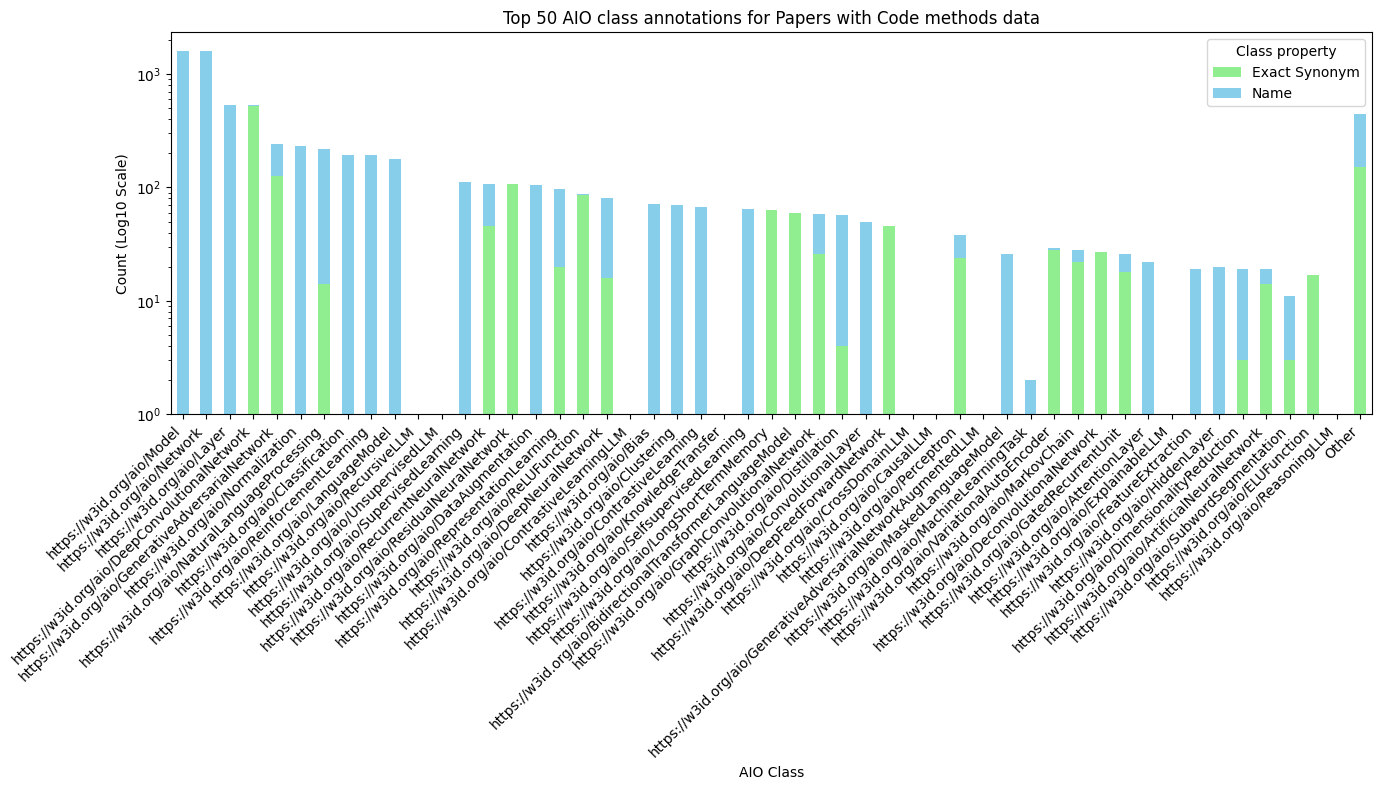

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_copy is prepared correctly

# Pivot the DataFrame to get counts for each predicate_id for each object_id
pivot_df = df_copy.pivot_table(index='object_id', columns='predicate_id', values='count', aggfunc='sum', fill_value=0)

# Drop the 'Related Synonym' column if it exists
pivot_df.drop(columns=['oio:hasRelatedSynonym'], errors='ignore', inplace=True)

# Rename columns according to the mapping
pivot_df.rename(columns={'rdfs:label': 'Name', 'oio:hasExactSynonym': 'Exact Synonym'}, inplace=True)

# Calculate total counts across 'Name' and 'Exact Synonym' for sorting
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort by total counts and select the top 50
top_50_df = pivot_df.sort_values('Total', ascending=False).head(50)

# Sum the counts for all other classes into an 'Other' category
other_sum = pivot_df.sort_values('Total', ascending=False).iloc[50:].sum()
other_df = pd.DataFrame(other_sum).transpose()
other_df.index = ['Other']

# Drop the 'Total' column as it's no longer needed
top_50_df.drop(columns=['Total'], inplace=True)
other_df.drop(columns=['Total'], inplace=True)

# Combine top 50 with 'Other'
final_df = pd.concat([top_50_df, other_df])

# Define colors for the columns we will plot
colors = {'Name': 'skyblue', 'Exact Synonym': 'lightgreen'}

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
# Plot only the columns present in final_df that have a color defined in the colors dictionary
plot_columns = [col for col in final_df.columns if col in colors]
final_df[plot_columns].plot(kind='bar', stacked=True, ax=ax, color=[colors[col] for col in plot_columns], logy=True)

plt.title('Top 50 AIO class annotations for Papers with Code methods data')
plt.xlabel('AIO Class')
plt.ylabel('Count (Log10 Scale)')
plt.xticks(rotation=45, ha='right')
# Update the legend to reflect the final column names
ax.legend(plot_columns, title='Class property')

plt.tight_layout()

plt.savefig('top_50_aio_annotations_corrected.png')
plt.savefig('top_50_aio_annotations_corrected.pdf')

plt.show()


In [17]:
final_df


predicate_id,Exact Synonym,Name,Related Synonym
https://w3id.org/aio/Model,0,1609,0
https://w3id.org/aio/Network,0,1608,0
https://w3id.org/aio/Layer,0,529,0
https://w3id.org/aio/DeepConvolutionalNetwork,522,6,0
https://w3id.org/aio/GenerativeAdversarialNetwork,127,113,0
https://w3id.org/aio/Normalization,0,233,0
https://w3id.org/aio/NaturalLanguageProcessing,14,202,0
https://w3id.org/aio/Classification,0,192,0
https://w3id.org/aio/ReinforcementLearning,0,192,0
https://w3id.org/aio/LanguageModel,0,179,0


In [29]:
# Summing the values in the columns
sum_exact_synonym = final_df['Exact Synonym'].sum()
sum_name = final_df['Name'].sum()
sum_related_synonym = final_df['Related Synonym'].sum()

# Printing the sums
print("Sum of 'Exact Synonym':", sum_exact_synonym)
print("Sum of 'Name':", sum_name)
print("Sum of 'Related Synonym':", sum_related_synonym)

Sum of 'Exact Synonym': 1445
Sum of 'Name': 6137
Sum of 'Related Synonym': 727


In [19]:
#id_to_branch

In [20]:
#below is an earlier attempt
label_counts = subset_df['object_label'].value_counts().reset_index()
label_counts.columns = ['object_label', 'count']

print(label_counts)

                     object_label  count
0                           Model   1609
1                         Network   1608
2                           Layer    529
3    Convolutional Neural Network    308
4                   Normalization    233
..                            ...    ...
210  Principal Component Analysis      1
211                           TAR      1
212       Unsupervised Clustering      1
213                           SAE      1
214          Regularization Layer      1

[215 rows x 2 columns]


In [21]:
label_counts_by_predicate = subset_df.groupby(['predicate_id', 'object_label']).size().reset_index(name='count')

print(label_counts_by_predicate)

            predicate_id              object_label  count
0    oio:hasExactSynonym                        AE      4
1    oio:hasExactSynonym                      ARCH      3
2    oio:hasExactSynonym                      ARMA      4
3    oio:hasExactSynonym                      BERT     60
4    oio:hasExactSynonym                 BatchNorm      8
..                   ...                       ...    ...
210           rdfs:label     Unsupervised Learning     11
211           rdfs:label  Variational Auto Encoder      1
212           rdfs:label        Zero-shot Learning      1
213           rdfs:label                  node2vec      5
214           rdfs:label                  word2vec     13

[215 rows x 3 columns]


In [22]:
label_counts_by_predicate['predicate_id'].unique()

array(['oio:hasExactSynonym', 'oio:hasRelatedSynonym', 'rdfs:label'],
      dtype=object)

In [23]:
# Define a mapping from old predicate_id values to new ones
predicate_id_mapping = {
    'oio:hasExactSynonym': 'ExactSynonym',
    'oio:hasRelatedSynonym': 'RelatedSynonym',
    'rdfs:label': 'Label'
}

# Replace the values in the predicate_id column based on the mapping
label_counts_by_predicate['predicate_id'] = label_counts_by_predicate['predicate_id'].replace(predicate_id_mapping)

print(label_counts_by_predicate)

     predicate_id              object_label  count
0    ExactSynonym                        AE      4
1    ExactSynonym                      ARCH      3
2    ExactSynonym                      ARMA      4
3    ExactSynonym                      BERT     60
4    ExactSynonym                 BatchNorm      8
..            ...                       ...    ...
210         Label     Unsupervised Learning     11
211         Label  Variational Auto Encoder      1
212         Label        Zero-shot Learning      1
213         Label                  node2vec      5
214         Label                  word2vec     13

[215 rows x 3 columns]


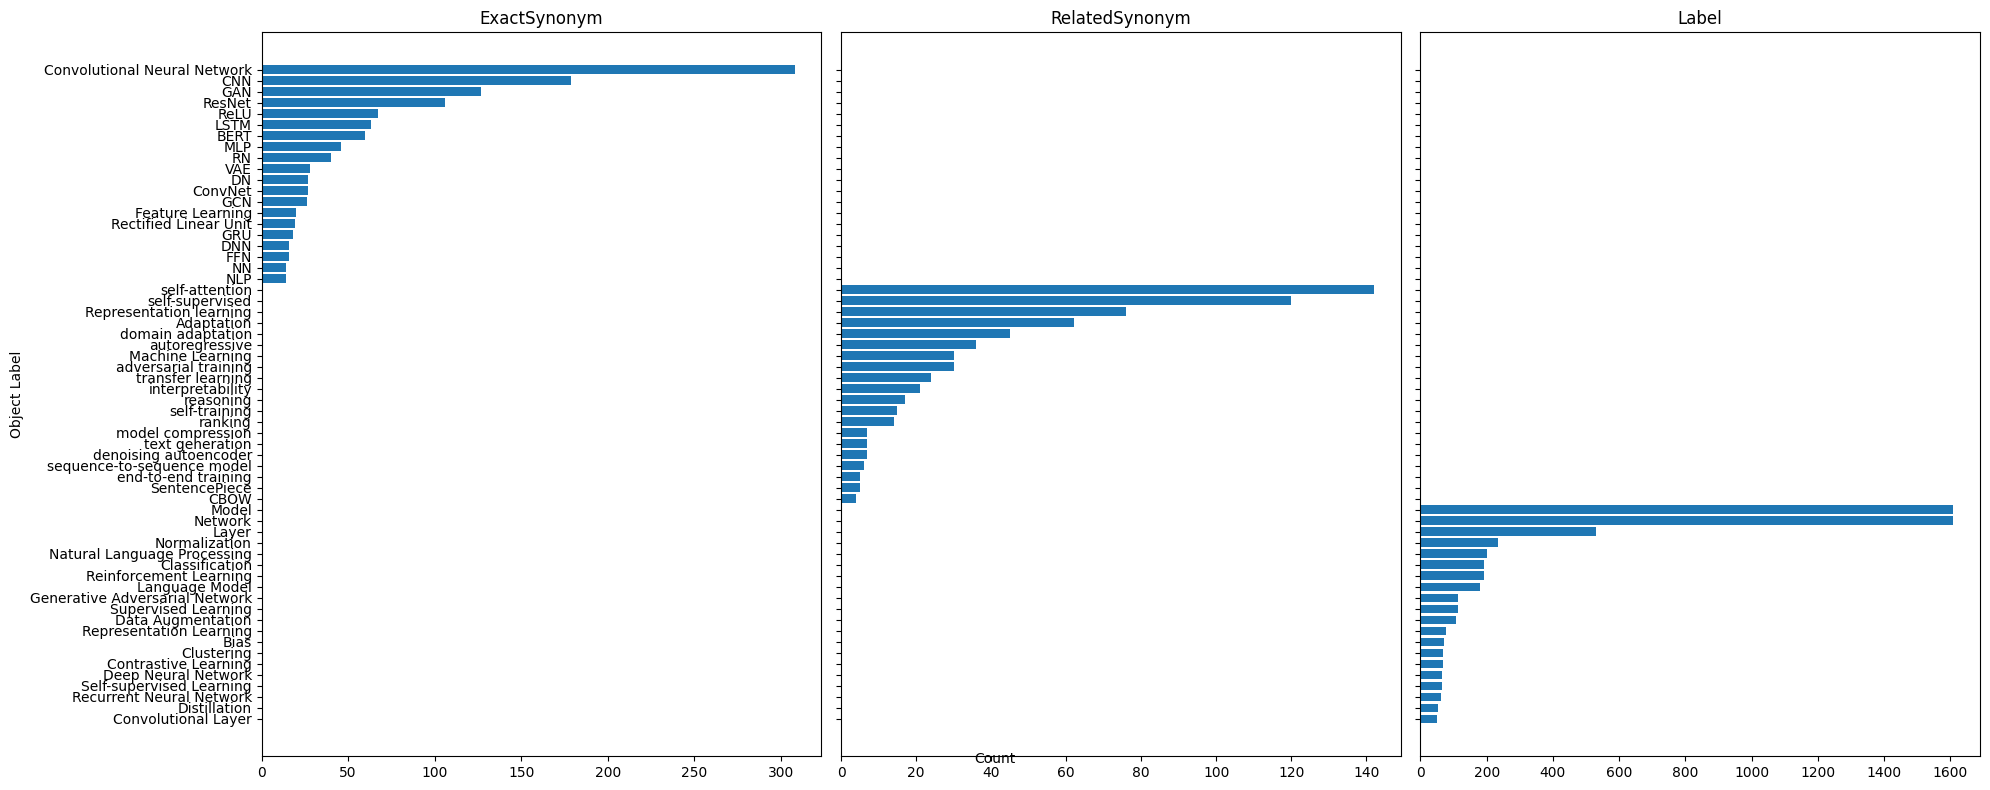

In [24]:
# Assuming label_counts_by_predicate is your DataFrame
predicate_ids = ['ExactSynonym', 'RelatedSynonym', 'Label']

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=len(predicate_ids), figsize=(20, 8), sharey=True)

for i, predicate_id in enumerate(predicate_ids):
    # Filter the DataFrame for the current predicate_id
    subset = label_counts_by_predicate[label_counts_by_predicate['predicate_id'] == predicate_id]
    
    # Sort the subset by count in descending order and take the top 20
    top_20 = subset.sort_values(by='count', ascending=False).head(20)
    
    # Plot
    axes[i].barh(top_20['object_label'], top_20['count'])
    axes[i].set_title(predicate_id)
    axes[i].invert_yaxis()  # Invert y-axis to have the highest count on top

# Set the y-axis label
axes[0].set_ylabel('Object Label')

# Set a common x-axis label
fig.text(0.5, 0.04, 'Count', ha='center')

plt.tight_layout()
plt.show()

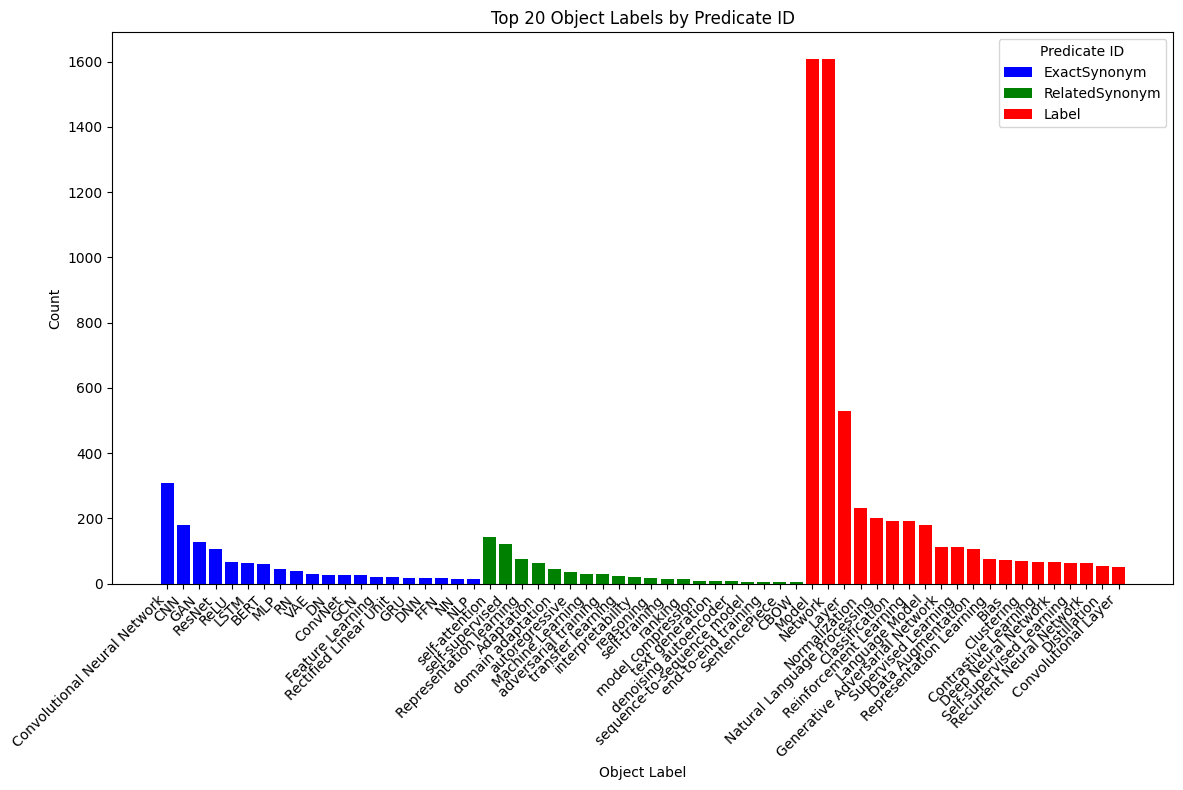

In [25]:
# Assuming label_counts_by_predicate is your DataFrame
predicate_ids = ['ExactSynonym', 'RelatedSynonym', 'Label']
colors = ['blue', 'green', 'red']  # Colors for each predicate_id

# Prepare a DataFrame to hold the top 20 object_labels across all predicate_ids
top_20_combined = pd.DataFrame()

for predicate_id in predicate_ids:
    # Filter and sort the DataFrame for the current predicate_id
    subset = label_counts_by_predicate[label_counts_by_predicate['predicate_id'] == predicate_id]
    top_20 = subset.sort_values(by='count', ascending=False).head(20)
    
    # Append to the combined DataFrame
    top_20_combined = pd.concat([top_20_combined, top_20])

# Ensure there are no duplicate object_labels in the top 20 combined list
# This step might need adjustment based on how you want to handle duplicates
top_20_combined = top_20_combined.drop_duplicates(subset=['object_label'], keep='first')

# Plotting
plt.figure(figsize=(12, 8))

# Create a bar plot for each predicate_id type
for predicate_id, color in zip(predicate_ids, colors):
    # Filter the combined top 20 for the current predicate_id
    subset = top_20_combined[top_20_combined['predicate_id'] == predicate_id]
    
    # Plot
    plt.bar(subset['object_label'], subset['count'], color=color, label=predicate_id)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Object Label')
plt.title('Top 20 Object Labels by Predicate ID')
plt.legend(title='Predicate ID')

plt.tight_layout()
plt.show()

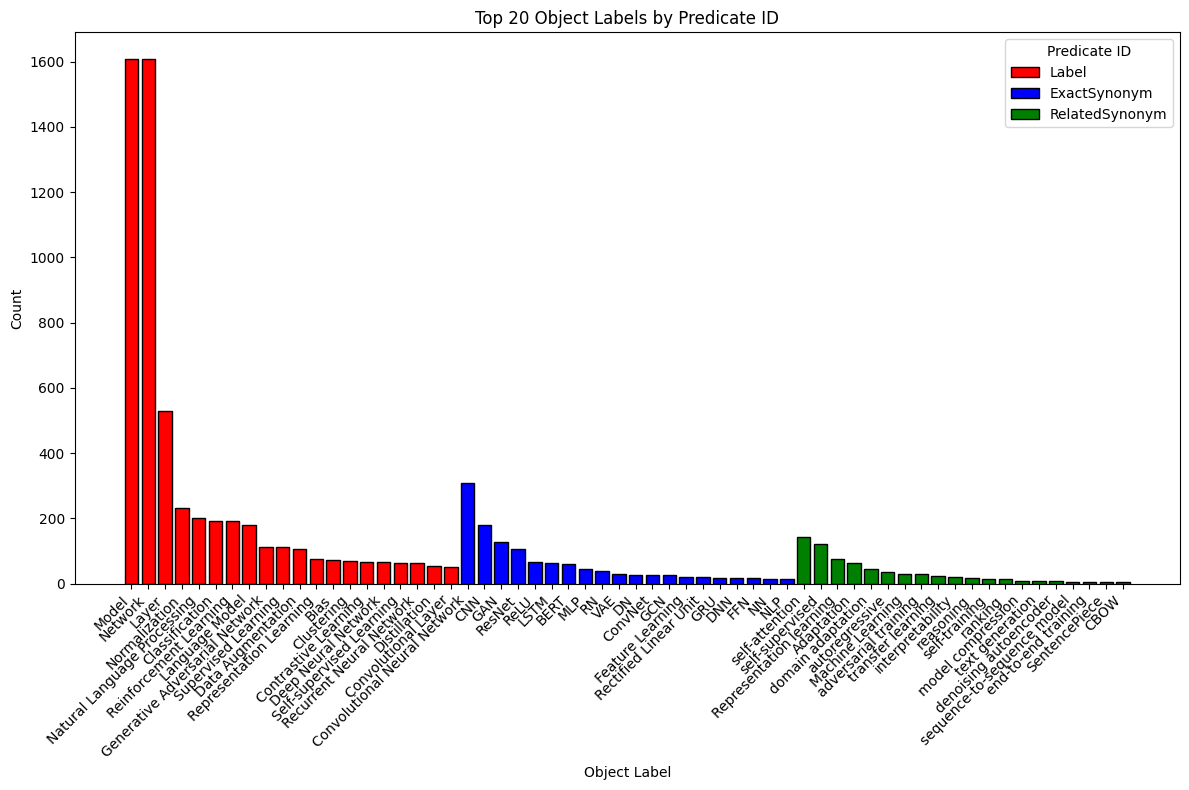

In [26]:

# Assuming label_counts_by_predicate is your DataFrame
# Adjust the order of predicate_ids and corresponding colors
predicate_ids = ['Label', 'ExactSynonym', 'RelatedSynonym']
colors = ['red', 'blue', 'green']  # Adjust colors as needed for visual distinction

# Prepare a DataFrame to hold the top 20 object_labels across all predicate_ids
top_20_combined = pd.DataFrame()

for predicate_id in predicate_ids:
    # Filter and sort the DataFrame for the current predicate_id
    subset = label_counts_by_predicate[label_counts_by_predicate['predicate_id'] == predicate_id]
    top_20 = subset.sort_values(by='count', ascending=False).head(20)
    
    # Append to the combined DataFrame
    top_20_combined = pd.concat([top_20_combined, top_20])

# Ensure there are no duplicate object_labels in the top 20 combined list
# This step might need adjustment based on how you want to handle duplicates
top_20_combined = top_20_combined.drop_duplicates(subset=['object_label'], keep='first')

# Plotting
plt.figure(figsize=(12, 8))

# Create a bar plot for each predicate_id type
for predicate_id, color in zip(predicate_ids, colors):
    # Filter the combined top 20 for the current predicate_id
    subset = top_20_combined[top_20_combined['predicate_id'] == predicate_id]
    
    # Plot
    plt.bar(subset['object_label'], subset['count'], color=color, label=predicate_id, edgecolor='black')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Object Label')
plt.title('Top 20 Object Labels by Predicate ID')
plt.legend(title='Predicate ID')

plt.tight_layout()
plt.show()